<a href="https://colab.research.google.com/github/kiakass/DeepLearning/blob/master/AML_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
'''

'\nfrom google.colab import files\nuploaded = files.upload() # 파일 업로드 기능 실행\n\nfor fn in uploaded.keys(): # 업로드된 파일 정보 출력\n    print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n        name=fn, length=len(uploaded[fn])))\n'

In [3]:
from IPython.display import Image
Image("mle.jpg",width = 400, height = 600)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp, scipy.stats
import pandas as pd
np.set_printoptions(linewidth=100)  # line 길이를 늘임

def Generate_input_x( x, M):
    '''
    : covert x to polynomial value
    '''
    return np.matrix([[x**i] for i in range(M+1)])


def Generate_matrix_x( x, M):
    '''
    : create x matrix  
    '''
    pi_x=None
    #basis_func=np.matrix([M + 1, num])
    for x in X:
        if np.where(X==x)[0][0] == 0 :
            pi_x = Generate_input_x(x, M)
        else: 
            conn_x = Generate_input_x(x, M)
            pi_x = np.concatenate((pi_x, conn_x),axis=1)
            
    return pi_x

def Generate_target_t(x,m,beta,num):
    '''
    : generate target t 
    '''
    np.random.seed(1234)
    epsilon = sp.stats.norm(m,beta**-1).rvs(num)
    return np.sin(2*np.pi*x) + epsilon

def Calculate_w( X,T,M, alpha=None, est=None):
    '''
    : MLE : w = (x.T*x)^-1 * x.T * t :  w value
    : MAP : w = (x.T*x + alpha*I)^-1 * x.T * t :  w value
    '''
    A = np.matrix(np.zeros((M + 1, M + 1)))
    b = np.matrix(np.zeros((M + 1,     1)))

    for x, t in zip(X,T):

        x_power = Generate_input_x(x,M)
        A += np.dot(x_power, x_power.T) 
        b += t * x_power
        #print('X:',x,'\n','T:',t,'\n','x_power:',x_power,'\n','A:',A,'\n','b:',b,'\n####')

    if est == "MAP":
        A += alpha * np.identity(M + 1)
        
    #print(A,'\n','b :',b)

    return np.dot(A.I, b)

[[-1.28238522e-02]
 [ 6.18357232e+00]
 [ 4.74344616e-01]
 [-3.99106598e+01]
 [-2.20028880e+00]
 [ 7.35408125e+01]
 [ 3.43776836e+00]
 [-5.56208312e+01]
 [-1.73474346e+00]
 [ 1.57868384e+01]]


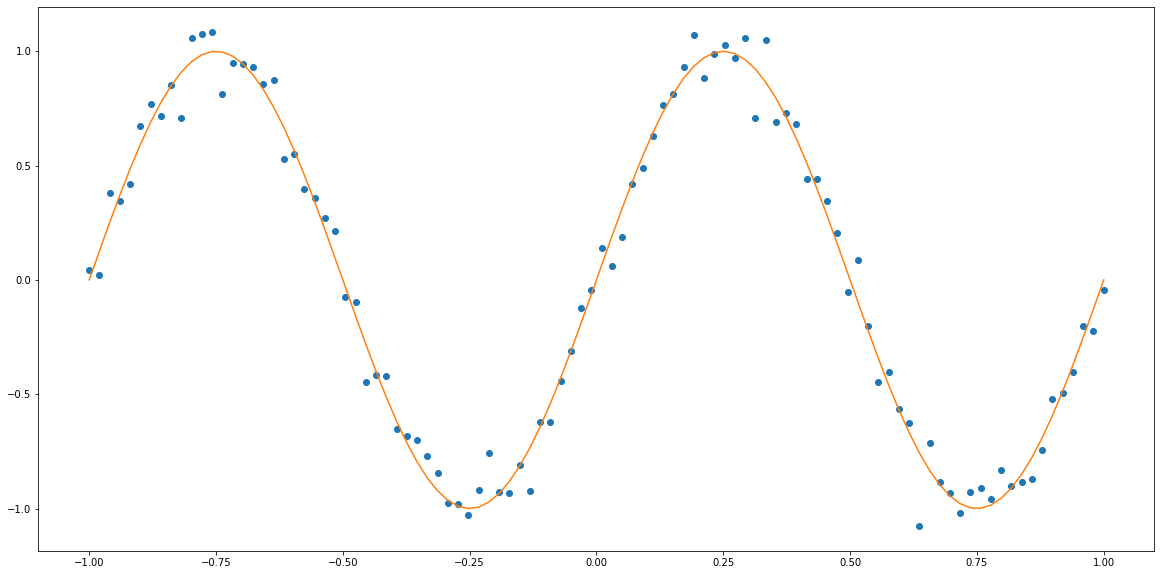

In [5]:
# init value
mean = 0
beta = 11.1

num = 100  # number of input x
M = 9      # polynomial order

alpha = 5*10**(-3) #learning rate is indicated in advance 


X = np.linspace(-1,1,num)
Y = np.sin(2*np.pi*X)
T = Generate_target_t(X,mean,beta,num)
#print('T:',T,'\n')
# plot X,Y,T
plt.figure(figsize=(20,10))
plt.plot(X,T,'o')
plt.plot(X,Y,'-')
# w for pandas index 
col = [ 'w'+str(i) for i in range(M+1) ]

# get MLE
est='MLE' 
# get w model parameter
w= Calculate_w(X,T,M,alpha,est) #; 
print(w)
#Baysian_V = pd.DataFrame(w, index=col, columns=[est])
# prediction
#MLE_prediction = estimator.predict(w,X,M)
# plot MLE
#estimator.make_plot(X,MLE_prediction,'-',est)  

In [6]:
# X = pi_x.T
pi_x = Generate_matrix_x(X,M)
print(pi_x.shape)

(10, 100)


In [7]:
pi_x.shape 

(10, 100)

1) MLE :  (X = pi_x.T) 

    - LOSS function:  $\; { L(w) = \frac{1}{2} \{y({x_n}, w) - t_n\}^2 }$ 
    - derivative: ${ \frac{\partial L(w)}{\partial w} = (XW - t_n)^t X = 0 }$ 
    - W val: $\; { W = (X^TX)^{-1} X^T t_n}$

### TEST

In [8]:
np.dot(np.linalg.inv(np.dot(pi_x, pi_x.T)),np.dot(pi_x,np.array(T).reshape(100,-1))).reshape(10,-1)

matrix([[-1.28238522e-02],
        [ 6.18357232e+00],
        [ 4.74344616e-01],
        [-3.99106598e+01],
        [-2.20028880e+00],
        [ 7.35408125e+01],
        [ 3.43776836e+00],
        [-5.56208312e+01],
        [-1.73474346e+00],
        [ 1.57868384e+01]])

In [9]:
w

matrix([[-1.28238522e-02],
        [ 6.18357232e+00],
        [ 4.74344616e-01],
        [-3.99106598e+01],
        [-2.20028880e+00],
        [ 7.35408125e+01],
        [ 3.43776836e+00],
        [-5.56208312e+01],
        [-1.73474346e+00],
        [ 1.57868384e+01]])

2) MAP :  <br><br>
    - LOSS function:  $\; { L(w) = \frac{1}{2} \{y({x_n}, w) - t_n\}^2 + \frac{\alpha}{2}W^TW}$ <br>
    - derivative: ${ \frac{\partial L(w)}{\partial w} = (XW - t_n)^t X + \alpha W^T= 0 }$ <br>
    - W val: $\; { W = (X^TX+\alpha I)^{-1} X^T t_n}$

In [10]:
np.dot(np.linalg.inv(np.dot(pi_x, pi_x.T)+alpha*np.identity(10)),np.dot(pi_x,np.array(T).reshape(100,-1))).reshape(10,-1)

matrix([[-1.18058095e-03],
        [ 4.04087763e+00],
        [ 9.61567432e-02],
        [-1.87389639e+01],
        [-2.59571330e-01],
        [ 1.38946645e+01],
        [ 2.46856655e-01],
        [ 8.46125680e+00],
        [-9.77895471e-02],
        [-7.54497482e+00]])

In [11]:
# get MAP 
est='MAP'
# get w model parameter
w = Calculate_w(X, T, M,alpha, est)
w

matrix([[-1.18058095e-03],
        [ 4.04087763e+00],
        [ 9.61567432e-02],
        [-1.87389639e+01],
        [-2.59571330e-01],
        [ 1.38946645e+01],
        [ 2.46856655e-01],
        [ 8.46125680e+00],
        [-9.77895471e-02],
        [-7.54497482e+00]])

3) FULLY BAYESIAN

In [12]:
from IPython.display import Image
Image("fully_bayesian.png",width = 600, height = 400)

In [13]:
def Calculate_fully_bayes(pi_x,T,M, alpha, beta):
    '''
    : fully bayesian calculate
    : p(t|x,w,alpha,beta) = N(t|m(x),var)
    '''
    SN_1 = alpha*np.identity(10) + beta * np.matmul(pi_x,np.transpose(pi_x))
    mN = np.matmul(np.linalg.inv(SN_1),(beta*np.matmul(pi_x,T.reshape(-1,1))))

    FB_predict = []
    mu_acc = []
    var_acc = []
    for h_pi_x in np.hsplit(pi_x,100):
        mu = np.matmul(np.transpose(mN),h_pi_x)
        var_term1 = np.matmul(np.transpose(h_pi_x),np.linalg.inv(SN_1))
        var = (1/beta) + np.matmul(var_term1,h_pi_x)
        #print(mu,var,i)
        prob_t = np.random.normal(mu,var)[0][0]
        FB_predict.append(prob_t)
        mu_acc.append(mu.item())
        var_acc.append(var.item())

    return  FB_predict, mu_acc,   var_acc

In [14]:
predict, mu, var = Calculate_fully_bayes(pi_x,T,M, alpha, beta)

In [ ]:
predict

In [16]:
est='FULL'
sigma=np.average(np.sqrt(var))
up = [i+sigma for i in mu]
down = [i-sigma for i in mu]

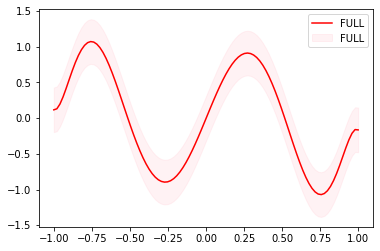

In [17]:
plt.plot(X,mu,'r-',label=est)
plt.fill_between(X,up,down,facecolor='yellow',alpha=0.2,color='pink',label=est)
    
plt.legend()

In [ ]:
mu #np.array(mu).shape

In [ ]:
var

In [110]:
S_1 = alpha*np.identity(10) + beta*np.dot(pi_x,pi_x.T);S_1

matrix([[1.11000500e+03, 7.14761583e-14, 3.77474747e+02, 7.51732010e-14, 2.31029489e+02,
         9.98201521e-14, 1.68309926e+02, 5.42232925e-14, 1.33498904e+02, 6.65467681e-14],
        [7.14761583e-14, 3.77479747e+02, 1.09678933e-13, 2.31029489e+02, 8.99613717e-14,
         1.68309926e+02, 5.66879876e-14, 1.33498904e+02, 6.65467681e-14, 1.11373554e+02],
        [3.77474747e+02, 1.09678933e-13, 2.31034489e+02, 8.99613717e-14, 1.68309926e+02,
         6.03850303e-14, 1.33498904e+02, 6.65467681e-14, 1.11373554e+02, 7.02438108e-14],
        [7.51732010e-14, 2.31029489e+02, 8.99613717e-14, 1.68314926e+02, 5.66879876e-14,
         1.33498904e+02, 5.91526828e-14, 1.11373554e+02, 7.14761583e-14, 9.60789187e+01],
        [2.31029489e+02, 8.99613717e-14, 1.68309926e+02, 5.66879876e-14, 1.33503904e+02,
         6.65467681e-14, 1.11373554e+02, 7.02438108e-14, 9.60789187e+01, 6.16173779e-14],
        [9.98201521e-14, 1.68309926e+02, 6.03850303e-14, 1.33498904e+02, 6.65467681e-14,
         1.11378

In [111]:
# 평균값
m_x = beta*np.dot(np.dot(pi_x.T,np.linalg.inv(S_1)),np.dot(pi_x,T.reshape(100,-1)))

In [103]:
x = np.array([[[0], [1], [2]]])
x.shape
(1, 3, 1)
np.squeeze(x)

array([0, 1, 2])

In [112]:
m_x_d=np.squeeze(m_x.reshape(-1).tolist())  # matrix를 list로 만들고 차원을 1차원으로 낮추기

In [44]:
s_x = 1/beta + np.dot(np.dot(pi_x.T,np.linalg.inv(S_1)),pi_x); s_x

In [59]:
s_x_d = np.diag(s_x) # iid 가정이므로 diagonal 값만 뽑아내야됨, 

In [60]:
t_x = [ np.random.normal(i,j)[0][0] for i,j in zip(m_x, s_x_d) ] ; t_x

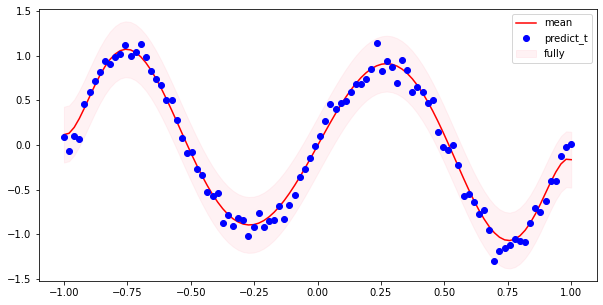

In [114]:
sigma=np.average(np.sqrt(s_x_d))
up = [i+sigma for i in m_x_d]
down = [i-sigma for i in m_x_d]

plt.figure(figsize=(10,5))
plt.plot(X,m_x,'r-',label="mean")
plt.plot(X,t_x,'bo',label="predict_t")
plt.fill_between(X,up,down,facecolor='yellow',alpha=0.2,color='pink',label='fully')
plt.legend()